In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv("job-market(2).csv")
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN


C:\Users\Madi\AppData\Local\Temp\ipykernel_21768\2078154097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Classification", data=df, order=data_order, palette = sns.color_palette("hsv"))
C:\Users\Madi\AppData\Local\Temp\ipykernel_21768\2078154097.py:7: UserWarning: 
The palette list has fewer values (6) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y="Classification", data=df, order=data_order, palette = sns.color_palette("hsv"))


<Axes: title={'center': 'Jobs and Number of Postings'}, xlabel='Number of Postings', ylabel='Classification'>

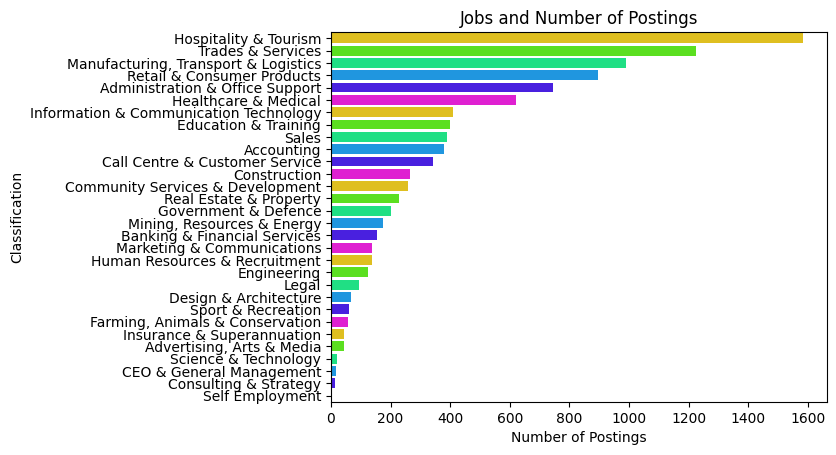

In [161]:
%matplotlib inline
# Jobs by classification & number of postings
# figure out why the colour palette is doing this !!
plt.title("Jobs and Number of Postings")
plt.xlabel("Number of Postings")
data_order = df["Classification"].value_counts().index
sns.countplot(y="Classification", data=df, order=data_order, palette = sns.color_palette("hsv"))

In [162]:
import matplotlib

#create dataframe for salary ranges

grouped = df.groupby("LowestSalary").size()
total = grouped.sum()
grouped = grouped/grouped.sum()*100 # change to represent a percentage of the total

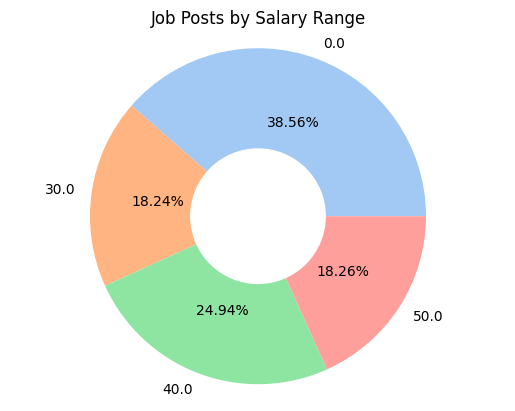

In [163]:
#salary ranges plot
plt.figure()
sns.set_palette('pastel')
plt.title("Job Posts by Salary Range")
plt.pie(grouped.values, labels=grouped.index, autopct='%1.2f%%', normalize=True)
circle = plt.Circle((0,0),0.4,color="white")
plt.gca().add_artist(circle)
plt.axis("equal")
plt.autoscale()


In [164]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19


In [165]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

total = locationDf["Id"].sum()
locationDf["PercentageOfMarketShare"] = (locationDf['Id']/total)*100

In [166]:

threshold = 3.5 # collect into an 'others' category if below this value
rows_below_threshold = locationDf[locationDf['PercentageOfMarketShare'] < threshold]

In [167]:
percentage_below_threshold = rows_below_threshold['PercentageOfMarketShare'].sum()
others_row = pd.DataFrame({'Location': 'Others', 'PercentageOfMarketShare' : percentage_below_threshold}, index=[0])
locationDf = locationDf[locationDf["PercentageOfMarketShare"] >= threshold]
locationDf = pd.concat([locationDf, others_row], ignore_index=True)
locationDf = locationDf.sort_values(by="PercentageOfMarketShare", ascending=False)
location_percs = locationDf["PercentageOfMarketShare"]
location_percs.index = locationDf["Location"]
location_percs

Location
Sydney       27.567086
Others       26.220418
Melbourne    24.566789
Brisbane     11.080305
Perth         6.703634
Adelaide      3.861768
Name: PercentageOfMarketShare, dtype: float64

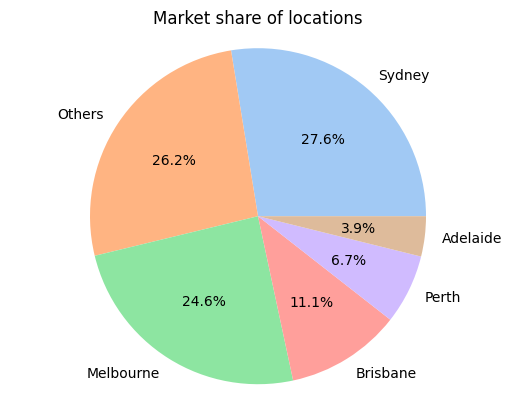

In [168]:
plt.figure()
plt.title("Market share of locations")
plt.pie(location_percs.values, labels=location_percs.index, autopct='%1.1f%%', normalize=True)
plt.axis("equal")
plt.autoscale()


